# Iris Flower Classification Problem

Have you ever heard of the Iris flower dataset? It is one of the most well-known datasets in the world of machine learning and data science, and for good reason. It consists of 150 records of Iris flowers, including information about their sepal and petal length and width, as well as the type of Iris flower. 

The Iris genus entails about 300 species, but our program will only classify the following three:

    Iris setosa
    Iris virginica
    Iris versicolor
    

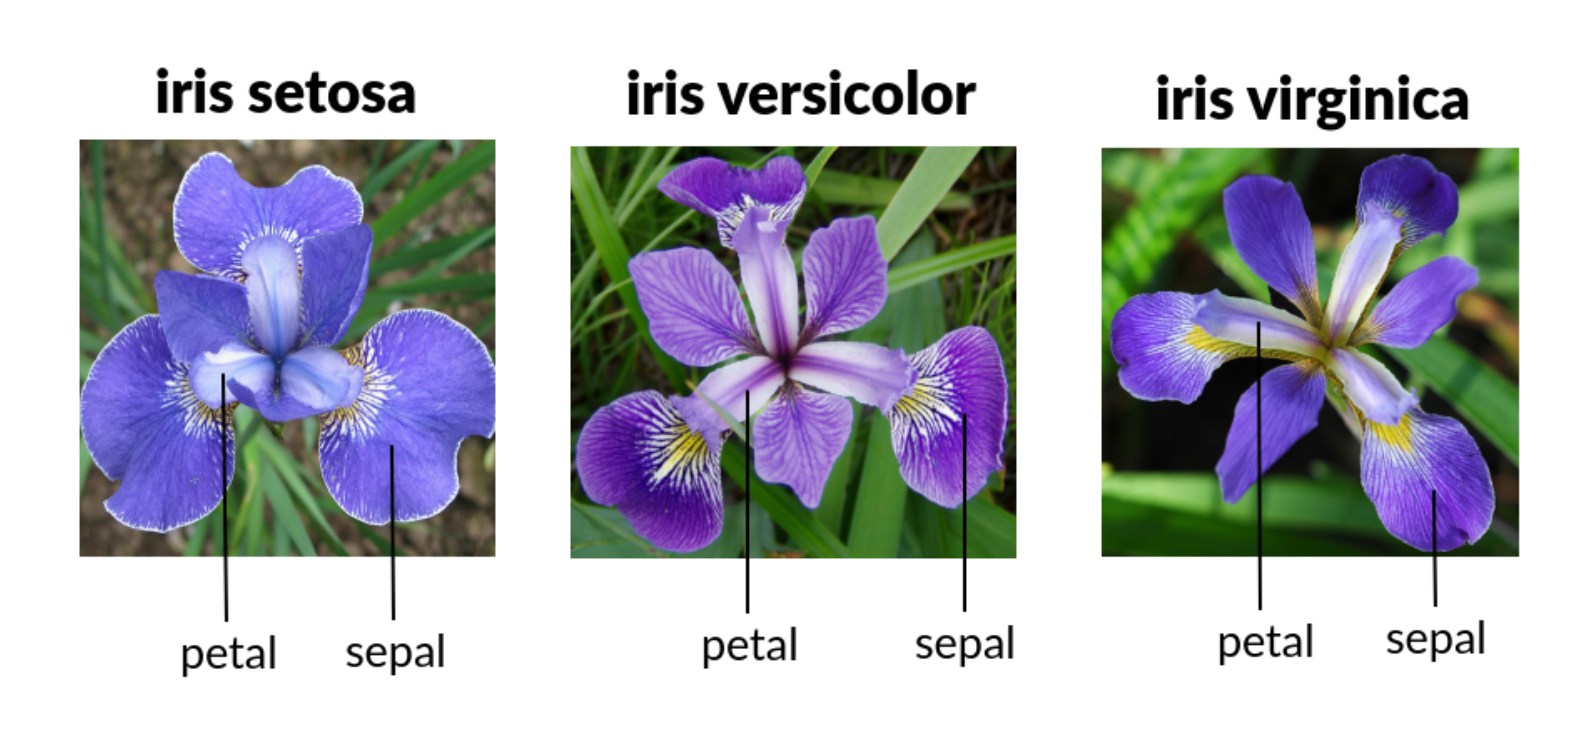

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the data

data = pd.read_csv("iris.csv")

In [3]:
#print the top 10 of the head of the data

data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [4]:
# Seperate the X and the Y variable.
# Y is the variety of the iris flowers

X = data.iloc[:, : -1].values
Y = data.iloc[:, -1].values

In [5]:
#print the x and y for inspection purposes

print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

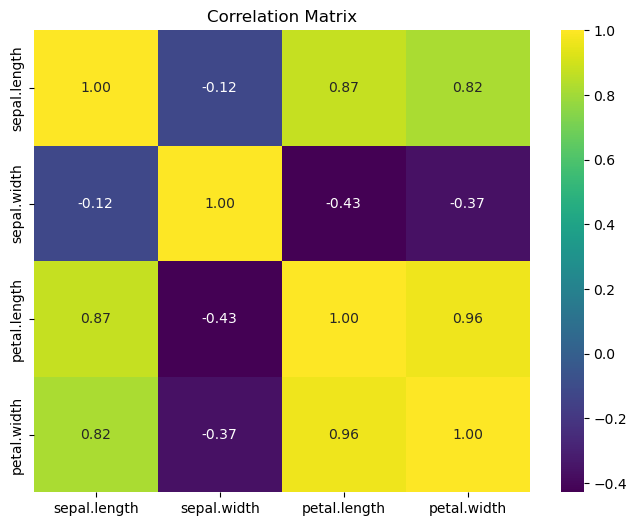

In [6]:
# Correlation matrix

correlation_matrix = data.corr(numeric_only = True)
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'viridis', fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Split the data to train and test dataset.
# the testing is 30%
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [8]:
# Feature Scaling for X variables
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[: , 1:] = sc.fit_transform(X_train[: , 1:])
X_test[: , 1:] = sc.transform(X_test[: , 1:])

In [9]:
#print the x_train and y_train for inspection purposes

print(X_train)
print(Y_train)

[[ 7.7        -1.05089682  1.77622921  1.42370971]
 [ 5.7         1.82764665 -1.14491883 -1.14263397]
 [ 5.          1.3478894  -1.3134466  -1.27095115]
 [ 4.8        -0.09138233 -1.3134466  -1.14263397]
 [ 5.2        -0.8110182   0.0909515   0.26885505]
 [ 5.1         0.86813216 -1.25727068 -1.27095115]
 [ 5.5         1.10801078 -1.36962252 -1.27095115]
 [ 7.7         1.82764665  1.66387736  1.29539252]
 [ 6.9         0.14849629  0.93359035  1.16707534]
 [ 7.3        -0.33126096  1.43917367  0.78212379]
 [ 6.4        -0.57113958  1.0459422   1.29539252]
 [ 6.2        -0.57113958  0.59653481  0.78212379]
 [ 6.          0.86813216  0.42800704  0.52548942]
 [ 7.7        -0.57113958  1.66387736  1.03875815]
 [ 5.7        -0.09138233  0.25947927  0.01222068]
 [ 4.8         0.86813216 -1.20109475 -1.27095115]
 [ 5.7        -1.29077545  0.70888666  1.03875815]
 [ 6.3        -0.8110182   0.65271073  0.78212379]
 [ 4.8        -0.09138233 -1.3134466  -1.39926834]
 [ 4.7         0.38837491 -1.36

# Use Random Forest model

Build a Random Forest Classifier Model with <b>n_estimator of 100</b> and <b>criterion of entropy</b>.
<div>
    The random forest classifier model object is name as <b>RF_classifier</b>
</div>

In [10]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RF_classifier = RF_classifier.fit(X_train, Y_train)

In [11]:
#Predict the X_test

RF_classifier.predict(X_test)

array(['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor'],
      dtype=object)

In [12]:
#Print the y_test and y_pred

Y_pred = RF_classifier.predict(X_test)
print(Y_test)
print(Y_pred)

['Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Versicolor'
 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica'
 'Versicolor' 'Virginica' 'Versicolor' 'Virginica' 'Virginica' 'Setosa'
 'Versicolor' 'Setosa' 'Versicolor' 'Virginica' 'Virginica' 'Setosa'
 'Virginica' 'Virginica' 'Versicolor']
['Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Versicolor'
 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica'
 'Versicolor' 'Virginica' 'Versicolor' 'Virginica' 'Virginica' 'Setosa'
 'Versicolor' 'Setosa' 'Versicolor' 'Virginica' 'Virginica'

In [13]:
# Confusion Matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [14]:
# Classification Report

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.94      0.94      0.94        18
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [15]:
#Predict the type of new iris flower where 
#sepal length is 6.5, sepal width is 3.8, petal length is 6.0 and petal width is 2.0

Y_pred_new = RF_classifier.predict(sc.fit_transform([[6.5,3.8,6.0,2.0]]))
print(Y_pred_new)

['Versicolor']


# Use Logistic Regression model

In [16]:
#Build Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [17]:
#Predict the X_test

LR_classifier.predict(X_test)

array(['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor'],
      dtype=object)

In [18]:
# Confusion Matrix

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [19]:
# Classification Report

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.94      0.94      0.94        18
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [20]:
#Predict the type of new iris flower where 
#sepal length is 6.5, sepal width is 3.8, petal length is 6.0 and petal width is 2.0

Y_pred_new = LR_classifier.predict([[6.5,3.8,6.0,2.0]])
print(Y_pred_new)

['Virginica']


# Use KNN model

Build a KNN Classifier Model with <b> number of neighbor is 7</b>
<div>
    The random forest classifier model object is name as <b>KNN_classifier</b>, metric is <b>miskowski</b> and <b>p=2</b>
</div>

In [21]:
from sklearn.neighbors import KNeighborsClassifier 

KNN_classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
KNN_classifier = KNN_classifier.fit(X_train, Y_train)

In [22]:
#Predict the X_test

KNN_classifier.predict(X_test)

array(['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor'],
      dtype=object)

In [23]:
# Confusion Matrix

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [24]:
# Classification Report

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.94      0.94      0.94        18
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [25]:
#Predict the type of new iris flower where 
#sepal length is 6.5, sepal width is 3.8, petal length is 6.0 and petal width is 2.0

Y_pred_new = KNN_classifier.predict([[6.5,3.8,6.0,2.0]])
print(Y_pred_new)

['Virginica']
